[*********************100%***********************]  1 of 1 completed


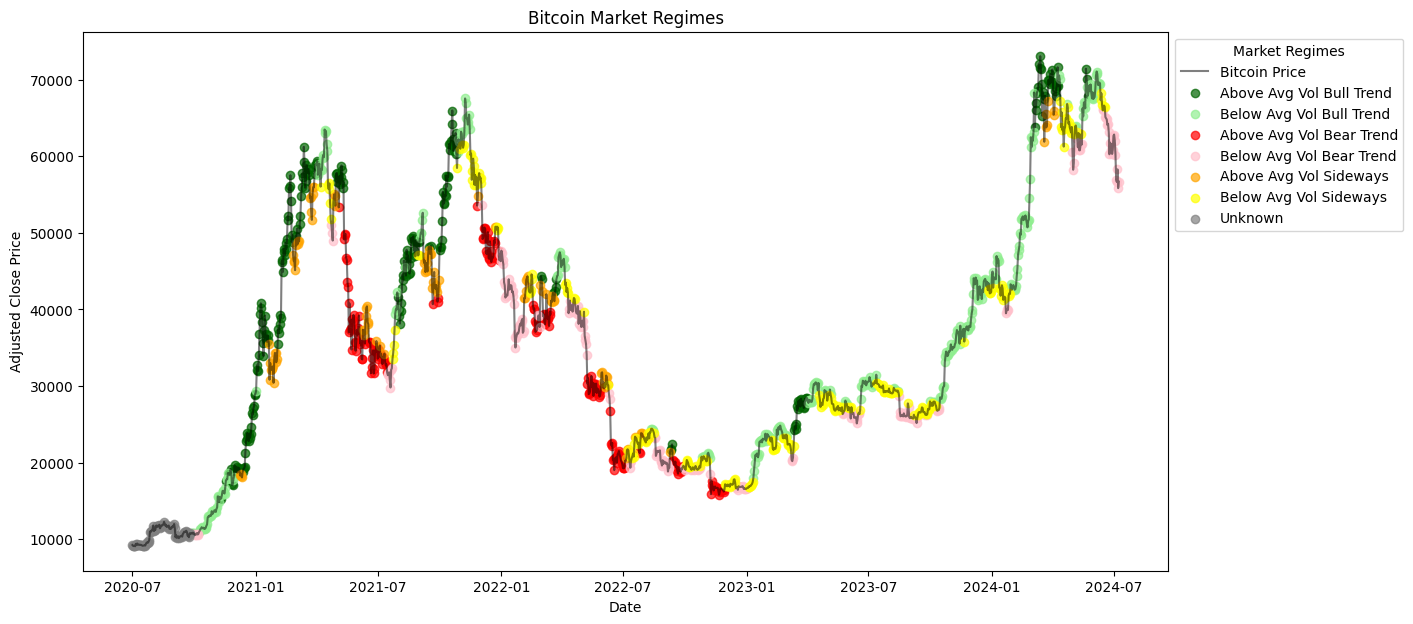

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch historical data for Bitcoin
btc_data = yf.download('BTC-USD', start='2020-07-01', end='2024-07-09')

# Calculate daily returns
btc_data['Return'] = btc_data['Adj Close'].pct_change()

# Calculate moving averages
btc_data['MA21'] = btc_data['Adj Close'].rolling(window=21).mean()
btc_data['MA88'] = btc_data['Adj Close'].rolling(window=88).mean()

# Calculate 21-day annualized realized volatility
btc_data['21d_Volatility'] = btc_data['Return'].rolling(window=21).std() * np.sqrt(365)

# Calculate 1-year average annualized volatility
btc_data['1yr_Volatility'] = btc_data['Return'].rolling(window=365).std() * np.sqrt(365)

# Determine market regimes
avg_vol_threshold = btc_data['1yr_Volatility'].mean()

conditions = [
    (btc_data['Adj Close'] > btc_data['MA21']) & 
    (btc_data['Adj Close'] > btc_data['MA88']) & 
    (btc_data['21d_Volatility'] > avg_vol_threshold),
    
    (btc_data['Adj Close'] > btc_data['MA21']) & 
    (btc_data['Adj Close'] > btc_data['MA88']) & 
    (btc_data['21d_Volatility'] <= avg_vol_threshold),
    
    (btc_data['Adj Close'] < btc_data['MA21']) & 
    (btc_data['Adj Close'] < btc_data['MA88']) & 
    (btc_data['21d_Volatility'] > avg_vol_threshold),
    
    (btc_data['Adj Close'] < btc_data['MA21']) & 
    (btc_data['Adj Close'] < btc_data['MA88']) & 
    (btc_data['21d_Volatility'] <= avg_vol_threshold),
    
    (btc_data['Adj Close'] >= btc_data['MA21']) & 
    (btc_data['Adj Close'] <= btc_data['MA88']) & 
    (btc_data['21d_Volatility'] > avg_vol_threshold),
    
    (btc_data['Adj Close'] >= btc_data['MA21']) & 
    (btc_data['Adj Close'] <= btc_data['MA88']) & 
    (btc_data['21d_Volatility'] <= avg_vol_threshold),
    
    (btc_data['Adj Close'] <= btc_data['MA21']) & 
    (btc_data['Adj Close'] >= btc_data['MA88']) & 
    (btc_data['21d_Volatility'] > avg_vol_threshold),
    
    (btc_data['Adj Close'] <= btc_data['MA21']) & 
    (btc_data['Adj Close'] >= btc_data['MA88']) & 
    (btc_data['21d_Volatility'] <= avg_vol_threshold)
]

choices = [
    'Above Avg Vol Bull Trend',
    'Below Avg Vol Bull Trend',
    'Above Avg Vol Bear Trend',
    'Below Avg Vol Bear Trend',
    'Above Avg Vol Sideways',
    'Below Avg Vol Sideways',
    'Above Avg Vol Sideways',
    'Below Avg Vol Sideways'
]

btc_data['Market Regime'] = np.select(conditions, choices, default='Unknown')

# Define colors for each regime
regime_colors = {
    'Above Avg Vol Bull Trend': 'darkgreen',
    'Below Avg Vol Bull Trend': 'lightgreen',
    'Above Avg Vol Bear Trend': 'red',
    'Below Avg Vol Bear Trend': 'pink',
    'Above Avg Vol Sideways': 'orange',
    'Below Avg Vol Sideways': 'yellow',
    'Unknown': 'gray'
}

# Plot the market regimes
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Adj Close'], color='black', alpha=0.5)
for regime in regime_colors.keys():
    subset = btc_data[btc_data['Market Regime'] == regime]
    plt.scatter(subset.index, subset['Adj Close'], label=regime, color=regime_colors[regime], alpha=0.7)
plt.legend(['Bitcoin Price'] + list(regime_colors.keys()), loc='upper left', bbox_to_anchor=(1, 1), title='Market Regimes')
plt.title('Bitcoin Market Regimes')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()


In [5]:
# Filter for the last four years
last_four_years = btc_data[btc_data.index >= (btc_data.index[-1] - pd.DateOffset(years=4))][['Market Regime']]

# Display the filtered DataFrame
print(last_four_years)


                       Market Regime
Date                                
2020-07-08                   Unknown
2020-07-09                   Unknown
2020-07-10                   Unknown
2020-07-11                   Unknown
2020-07-12                   Unknown
...                              ...
2024-07-04  Below Avg Vol Bear Trend
2024-07-05  Below Avg Vol Bear Trend
2024-07-06  Below Avg Vol Bear Trend
2024-07-07  Below Avg Vol Bear Trend
2024-07-08  Below Avg Vol Bear Trend

[1462 rows x 1 columns]


In [6]:
# Filter for the last four years and save to CSV
btc_data[btc_data.index >= (btc_data.index[-1] - pd.DateOffset(years=4))][['Market Regime']].to_csv('last_four_years_regime_categories_using_above_below_avg.csv')
